# PCA and Factor Analysis

## "Time-Use Case" Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import sys
sys.path.append('/anaconda/lib/python2.7/site-packages')
import seaborn as sns
sns.set_style("darkgrid")
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn import feature_selection
from sklearn.decomposition import PCA, FactorAnalysis
from pandas.tools.plotting import scatter_matrix
import factor_rotation as fr

In [2]:
#import csv
timeuse = pd.read_csv('time_use_1976.csv')
print len(timeuse)

28


In [3]:
timeuse.head()

,group,gender,professional_work_status,marital_status,country,professional,transport,housework,childcare,shopping,personal,mealtime,sleep,tv,leisure
0,maus,men,active,NaN,USA,610,140,60,10,120,95,115,760,175,315
1,waus,women,active,NaN,USA,475,90,250,30,140,120,100,775,115,305
2,wnaus,women,not active,NaN,USA,10,0,495,110,170,110,130,785,160,430
3,mnsus,men,NaN,not single,USA,615,141,65,10,115,90,115,765,180,305
4,wnsus,women,NaN,single,USA,179,29,421,87,161,112,119,776,143,373


In [4]:
#look for missing data
pd.isnull(timeuse).sum()

group                        0
gender                       0
professional_work_status    16
marital_status              12
country                      0
professional                 0
transport                    0
housework                    0
childcare                    0
shopping                     0
personal                     0
mealtime                     0
sleep                        0
tv                           0
leisure                      0
dtype: int64

In [5]:
#select only the time-use variables
df1 = timeuse.iloc[:, 5:15]
df1.head()

,professional,transport,housework,childcare,shopping,personal,mealtime,sleep,tv,leisure
0,610,140,60,10,120,95,115,760,175,315
1,475,90,250,30,140,120,100,775,115,305
2,10,0,495,110,170,110,130,785,160,430
3,615,141,65,10,115,90,115,765,180,305
4,179,29,421,87,161,112,119,776,143,373


In [67]:
#view min and max of time-use variables
timeuse.describe()

,professional,transport,housework,childcare,shopping,personal,mealtime,sleep,tv,leisure
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,448.857143,86.071429,276.964286,33.321429,108.678571,94.857143,118.071429,785.607143,99.428571,348.428571
std,226.976376,48.095529,198.606718,30.457078,32.514445,11.555708,25.703334,29.586457,39.408994,64.294132
min,10.000000,0.000000,50.000000,0.000000,52.000000,77.000000,85.000000,745.000000,40.000000,228.000000
25%,356.750000,47.500000,96.500000,10.000000,85.000000,89.500000,100.000000,761.500000,64.750000,308.750000
50%,535.000000,95.500000,256.000000,22.000000,112.000000,92.000000,110.000000,775.000000,91.500000,361.000000
75%,630.750000,127.000000,423.500000,56.000000,131.000000,96.250000,132.500000,808.250000,122.750000,388.250000
max,655.000000,148.000000,710.000000,110.000000,170.000000,130.000000,180.000000,848.000000,180.000000,475.000000


## Exploratory Data Analysis

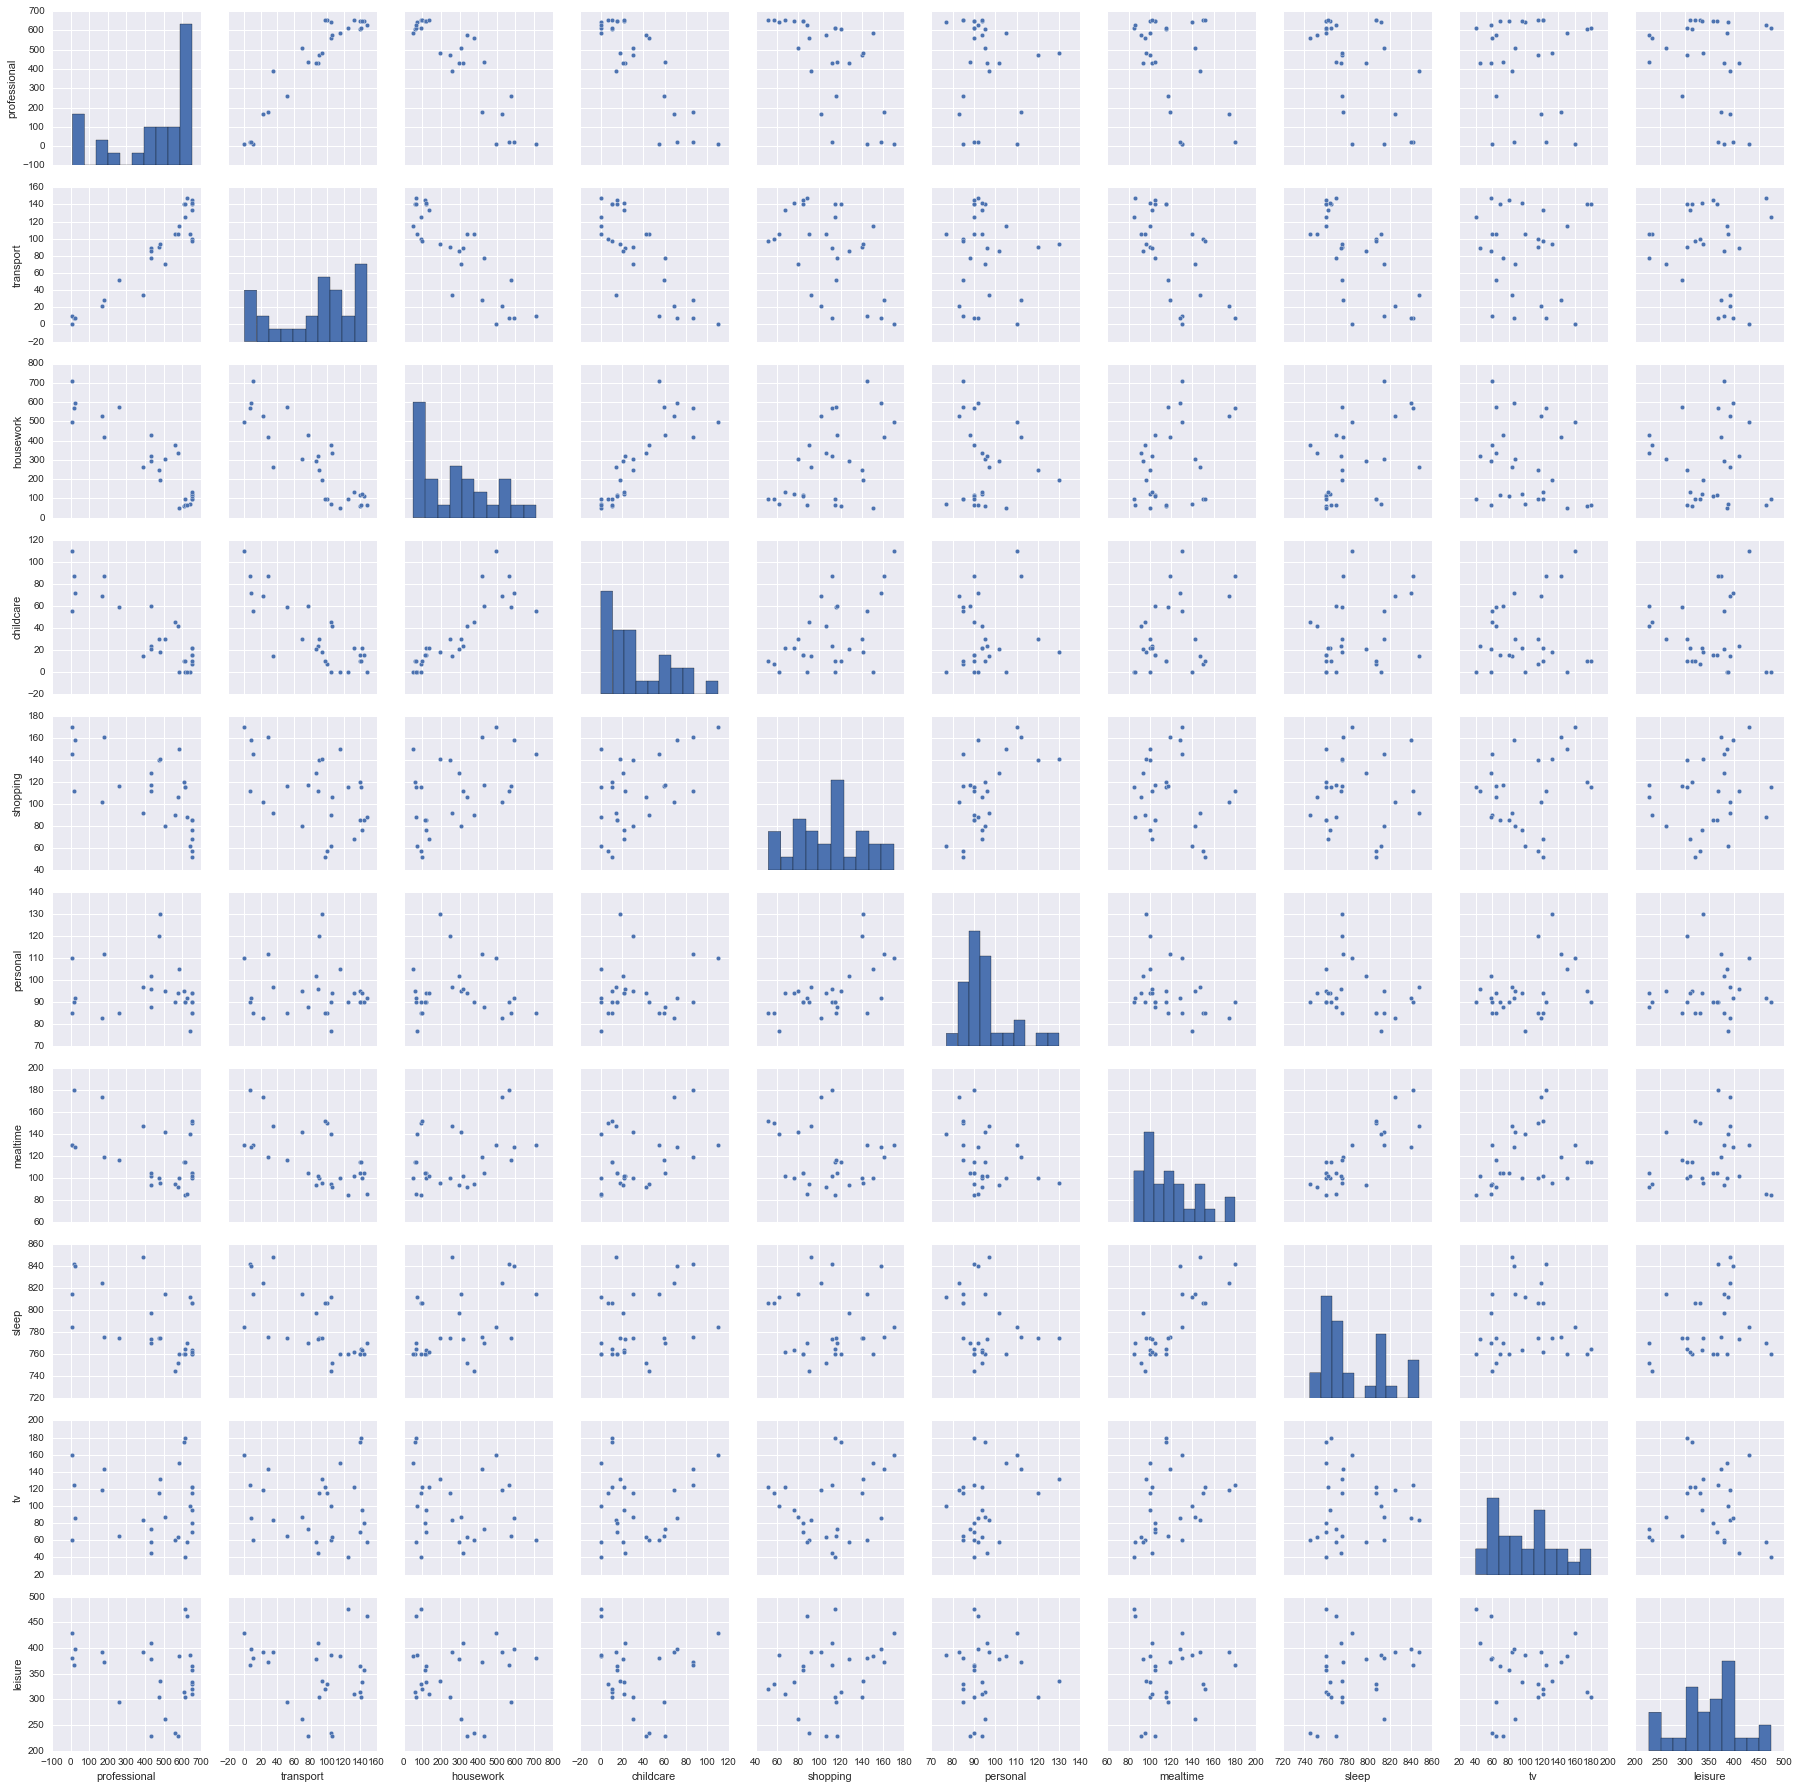

In [6]:
#scatterplot matrix of time-use variables
sns.pairplot(df1)

In [7]:
#correlation matrix
df1.corr()

,professional,transport,housework,childcare,shopping,personal,mealtime,sleep,tv,leisure
professional,1.000000,0.939146,-0.906398,-0.864779,-0.654015,-0.112085,-0.461478,-0.558446,-0.055886,-0.250538
transport,0.939146,1.000000,-0.870412,-0.810035,-0.503057,-0.077350,-0.610170,-0.704684,-0.041169,-0.164435
housework,-0.906398,-0.870412,1.000000,0.861274,0.499720,-0.039976,0.358374,0.437793,-0.205751,-0.053089
childcare,-0.864779,-0.810035,0.861274,1.000000,0.541772,0.117891,0.364119,0.280785,0.121612,-0.054544
shopping,-0.654015,-0.503057,0.499720,0.541772,1.000000,0.590629,-0.182912,-0.021966,0.218571,0.229963
personal,-0.112085,-0.077350,-0.039976,0.117891,0.590629,1.000000,-0.353476,-0.211088,0.324885,0.038271
mealtime,-0.461478,-0.610170,0.358374,0.364119,-0.182912,-0.353476,1.000000,0.818196,0.317928,0.065580
sleep,-0.558446,-0.704684,0.437793,0.280785,-0.021966,-0.211088,0.818196,1.000000,0.019653,0.272753
tv,-0.055886,-0.041169,-0.205751,0.121612,0.218571,0.324885,0.317928,0.019653,1.000000,-0.071656
leisure,-0.250538,-0.164435,-0.053089,-0.054544,0.229963,0.038271,0.065580,0.272753,-0.071656,1.000000


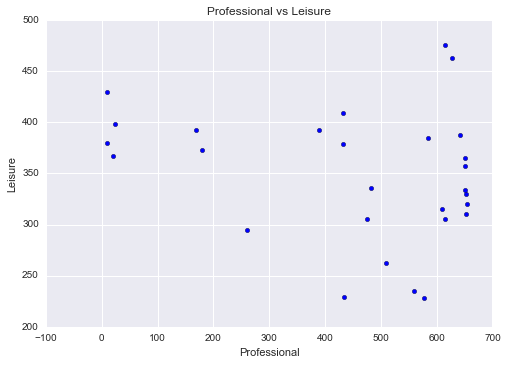

In [8]:
plt.scatter(x = "professional", y = "leisure", data = df1)
plt.xlabel('Professional')
plt.ylabel('Leisure')
plt.title('Professional vs Leisure')

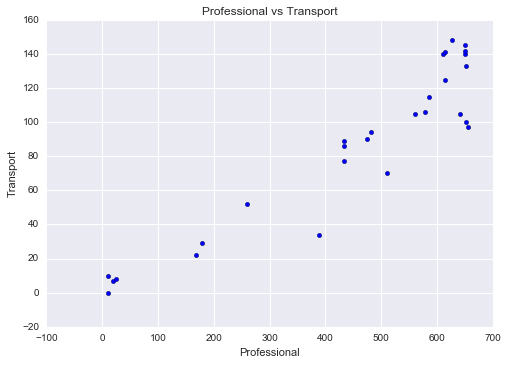

In [9]:
plt.scatter(x = "professional", y = "transport", data = df1)
plt.xlabel('Professional')
plt.ylabel('Transport')
plt.title('Professional vs Transport')

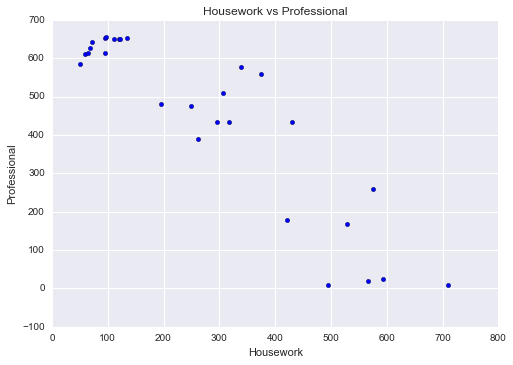

In [10]:
plt.scatter(x = "housework", y = "professional", data = df1)
plt.xlabel('Housework')
plt.ylabel('Professional')
plt.title('Housework vs Professional')

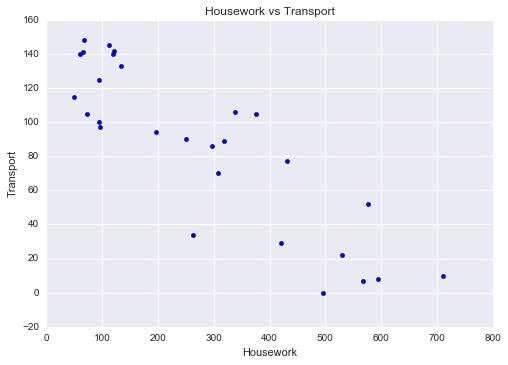

In [11]:
plt.scatter(x = "housework", y = "transport", data = df1)
plt.xlabel('Housework')
plt.ylabel('Transport')
plt.title('Housework vs Transport')

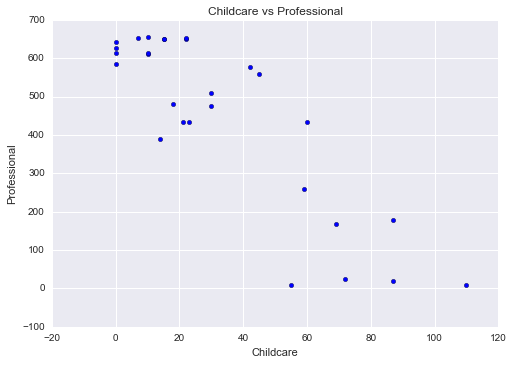

In [12]:
plt.scatter(x = "childcare", y = "professional", data = df1)
plt.xlabel('Childcare')
plt.ylabel('Professional')
plt.title('Childcare vs Professional')

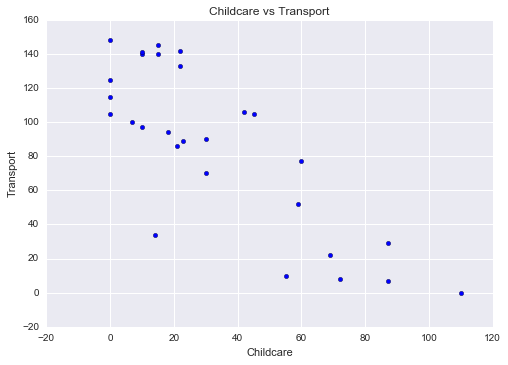

In [13]:
plt.scatter(x = "childcare", y = "transport", data = df1)
plt.xlabel('Childcare')
plt.ylabel('Transport')
plt.title('Childcare vs Transport')

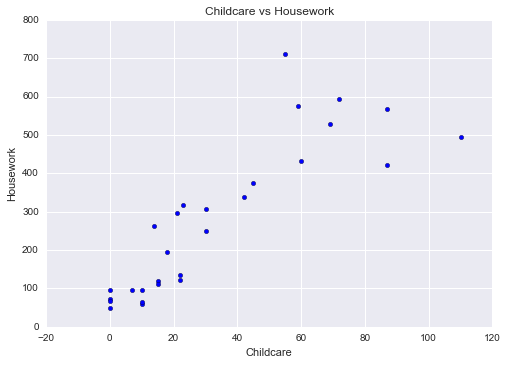

In [14]:
plt.scatter(x = "childcare", y = "housework", data = df1)
plt.xlabel('Childcare')
plt.ylabel('Housework')
plt.title('Childcare vs Housework')

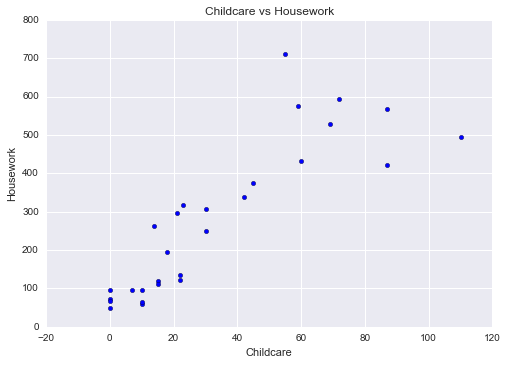

In [15]:
plt.scatter(x = "childcare", y = "housework", data = df1)
plt.xlabel('Childcare')
plt.ylabel('Housework')
plt.title('Childcare vs Housework')

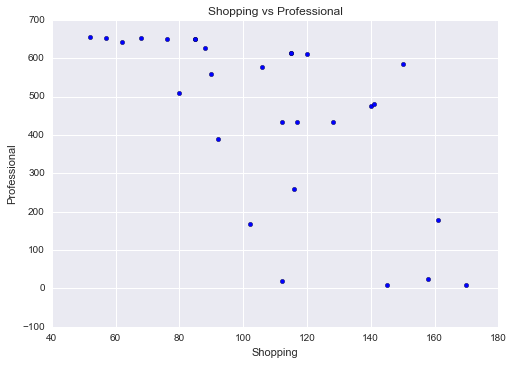

In [16]:
plt.scatter(x = "shopping", y = "professional", data = df1)
plt.xlabel('Shopping')
plt.ylabel('Professional')
plt.title('Shopping vs Professional')

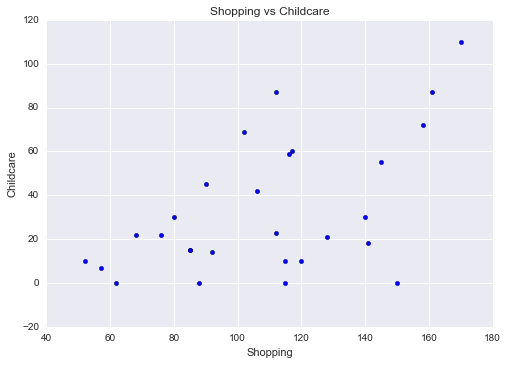

In [17]:
plt.scatter(x = "shopping", y = "childcare", data = df1)
plt.xlabel('Shopping')
plt.ylabel('Childcare')
plt.title('Shopping vs Childcare')

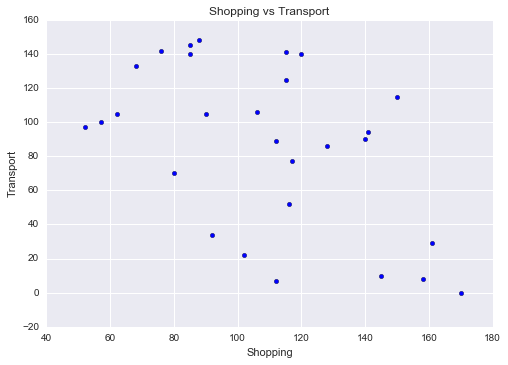

In [18]:
plt.scatter(x = "shopping", y = "transport", data = df1)
plt.xlabel('Shopping')
plt.ylabel('Transport')
plt.title('Shopping vs Transport')

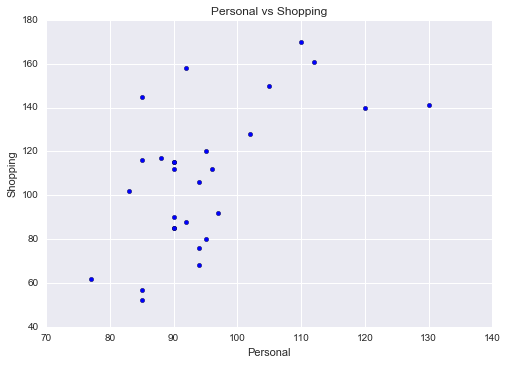

In [19]:
plt.scatter(x = "personal", y = "shopping", data = df1)
plt.xlabel('Personal')
plt.ylabel('Shopping')
plt.title('Personal vs Shopping')

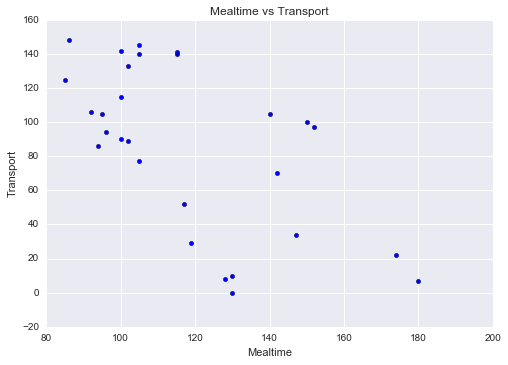

In [20]:
plt.scatter(x = "mealtime", y = "transport", data = df1)
plt.xlabel('Mealtime')
plt.ylabel('Transport')
plt.title('Mealtime vs Transport')

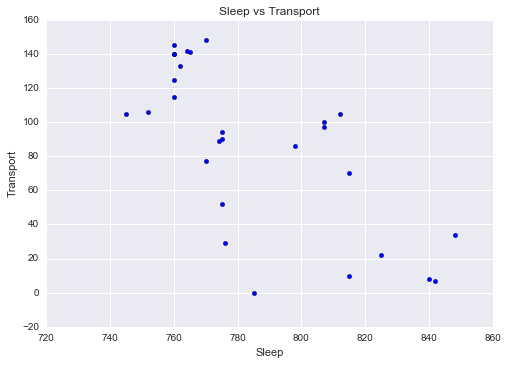

In [21]:
plt.scatter(x = "sleep", y = "transport", data = df1)
plt.xlabel('Sleep')
plt.ylabel('Transport')
plt.title('Sleep vs Transport')

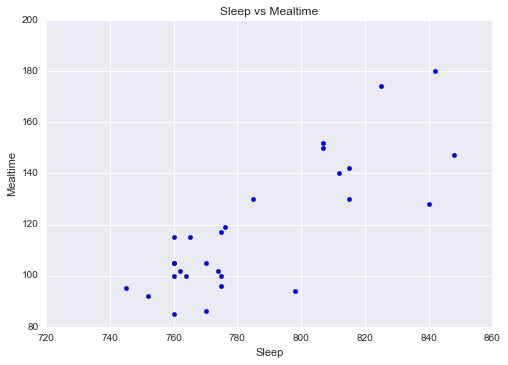

In [22]:
plt.scatter(x = "sleep", y = "mealtime", data = df1)
plt.xlabel('Sleep')
plt.ylabel('Mealtime')
plt.title('Sleep vs Mealtime')

## Principal Component Analysis - Original / Unrotated

In [23]:
df2 = df1
pca_variables_df = df2

# standard scores have zero mean and unit standard deviation
from sklearn import preprocessing
pca_data = preprocessing.scale(pca_variables_df.as_matrix())

/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [24]:
#find explained variance for each principal component
pca = PCA()
pca.fit(pca_data)
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

[  4.61720629e+00   2.09997139e+00   1.33037184e+00   1.16384699e+00
   4.76070498e-01   2.03274714e-01   4.74636253e-02   3.72923455e-02
   2.24738994e-02   2.02839795e-03]
[  4.61720629e-01   2.09997139e-01   1.33037184e-01   1.16384699e-01
   4.76070498e-02   2.03274714e-02   4.74636253e-03   3.72923455e-03
   2.24738994e-03   2.02839795e-04]
[ 0.46172063  0.67171777  0.80475495  0.92113965  0.9687467   0.98907417
  0.99382054  0.99754977  0.99979716  1.        ]


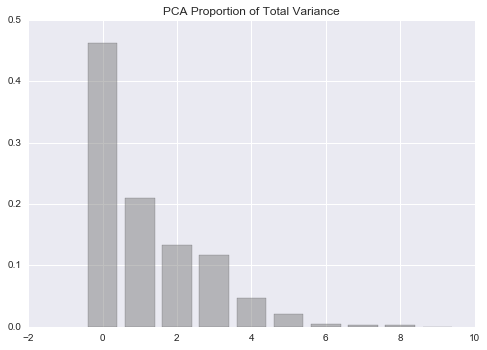

In [25]:
pca_explained_variance = pca.explained_variance_ratio_

# show the scree plot for the pricipal component analysis
plt.bar(np.arange(len(pca_explained_variance)), pca_explained_variance, 
    color = 'grey', alpha = 0.5, align = 'center')
plt.title('PCA Proportion of Total Variance')  

In [26]:
#view eigenvalues and eigenvectors
pcaun_data_cormat = np.corrcoef(pca_data.T)
eigenvalues, eigenvectors = np.linalg.eig(pcaun_data_cormat)
print(eigenvalues)
print(eigenvectors)
print('Linear algebra demonstration: Proportion of variance explained: ',
    eigenvalues/eigenvalues.sum())

[  4.61720629e+00   2.09997139e+00   1.33037184e+00   1.16384699e+00
   4.76070498e-01   2.03274714e-01   2.02839795e-03   4.74636253e-02
   3.72923455e-02   2.24738994e-02]
[[ 0.45632189  0.07778023 -0.06192518  0.06938421  0.11232269 -0.05396022
   0.75060207 -0.0540491   0.44122383 -0.02324535]
 [ 0.45631184 -0.03698298 -0.0096065   0.01289426 -0.16730562  0.0141048
   0.07853351  0.2406945  -0.49305393  0.67435864]
 [-0.4162419  -0.02451427  0.34574896  0.14616781 -0.00587733  0.07948403
   0.57991626 -0.18039992 -0.54346248 -0.12117605]
 [-0.40245782 -0.13495849  0.12013688  0.25861038 -0.2949939  -0.55306306
   0.10929161  0.41808088  0.30262753  0.25938747]
 [-0.26186295 -0.52155735 -0.02217281 -0.13974493 -0.12201555  0.60447668
   0.1010546  -0.10140887  0.32164927  0.36762965]
 [-0.03539352 -0.56363775 -0.27063065 -0.04917725  0.63884132 -0.38931045
   0.02200622 -0.12101936 -0.15225327  0.08607297]
 [-0.2749919   0.45518128 -0.36317146  0.11759389  0.00845517 -0.12497703
   

In [27]:
print pca.n_components_

10


In [28]:
# compute full set of principal components (scores)
C = pca.transform(pca_variables_df)

In [29]:
# add 5 principal component scores to the original data frame
df2['c1'] = C[:,0]
df2['c2'] = C[:,1]
df2['c3'] = C[:,2]
df2['c4'] = C[:,3]
df2['c5'] = C[:,4]

In [30]:
pca_loadings = pca.components_.T

# provide full formatted listing of loadings for first five components
# print loadings while rounding to three digits 
# and suppress printing of very small numbers
# but do not suppress printing of zeroes
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print(pca_loadings[0:5,:])

[[-0.456 -0.078 -0.062 -0.069  0.112 -0.054 -0.054 -0.441  0.023  0.751]
 [-0.456  0.037 -0.010 -0.013 -0.167  0.014  0.241  0.493 -0.674  0.079]
 [ 0.416  0.025  0.346 -0.146 -0.006  0.079 -0.180  0.543  0.121  0.580]
 [ 0.402  0.135  0.120 -0.259 -0.295 -0.553  0.418 -0.303 -0.259  0.109]
 [ 0.262  0.522 -0.022  0.140 -0.122  0.604 -0.101 -0.322 -0.368  0.101]]


In [31]:
pca_loadings

array([[-0.456, -0.078, -0.062, -0.069,  0.112, -0.054, -0.054, -0.441,
         0.023,  0.751],
       [-0.456,  0.037, -0.010, -0.013, -0.167,  0.014,  0.241,  0.493,
        -0.674,  0.079],
       [ 0.416,  0.025,  0.346, -0.146, -0.006,  0.079, -0.180,  0.543,
         0.121,  0.580],
       [ 0.402,  0.135,  0.120, -0.259, -0.295, -0.553,  0.418, -0.303,
        -0.259,  0.109],
       [ 0.262,  0.522, -0.022,  0.140, -0.122,  0.604, -0.101, -0.322,
        -0.368,  0.101],
       [ 0.035,  0.564, -0.271,  0.049,  0.639, -0.389, -0.121,  0.152,
        -0.086,  0.022],
       [ 0.275, -0.455, -0.363, -0.118,  0.008, -0.125, -0.581, -0.065,
        -0.463,  0.003],
       [ 0.306, -0.395, -0.205,  0.199,  0.476,  0.257,  0.585,  0.003,
        -0.115,  0.142],
       [ 0.045,  0.144, -0.771, -0.281, -0.347,  0.114,  0.158,  0.198,
         0.299,  0.132],
       [ 0.084, -0.002, -0.144,  0.867, -0.320, -0.270, -0.045,  0.071,
         0.059,  0.185]])

In [32]:
# explore relationships between pairs of principal components
pcaun_model_data = df2.loc[:,['c1','c2','c3', 'c4', 'c5']]

## Principal Component Analysis - Rotated

In [64]:
# note that unrotated solutions are often difficult to interpret
# so we employ an orthogonal rotation called varimax
# that is, we rotate factor axes while maintaining their
# orthogonality (factor scores remain uncorrelated),
# and we do it in a way that maximizes the sum of the
# variances of the factor loadings....
# this has the effect of moving individual loadings
# in the direction of plus/minus one or zero, so a variable
# is either strongly associated with a factor or not....
# when loadings of variables on factors are either
# plus/minus one or zero, it is easier to interpret
# the factor analytic solution

# use factor_rotation module to obtain varimax rotation
# where varimax_rotation is a matrix representing a linear transformation
pca_loadings_subset = pca_loadings[0:2,:]
varimax_loadings, varimax_rotation = fr.rotate_factors(pca_loadings,'varimax')

# show the loadings of the variables on the varimax-rotated factors
# for the unrotated maximum likelihood solution
# print loadings while rounding to three digits 
# and suppress printing of very small numbers
# but do not suppress printing of zeroes
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print('Varimax factor loadings: ',varimax_loadings)  

('Varimax factor loadings: ', array([[-0.000, -0.000,  0.000,  0.000, -0.000,  0.000, -0.000, -0.000,
        -0.000,  1.000],
       [ 0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  0.000, -0.000,
        -1.000, -0.000],
       [-0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000,  1.000,
        -0.000,  0.000],
       [ 1.000,  0.000, -0.000,  0.000,  0.000, -0.000,  0.000,  0.000,
         0.000,  0.000],
       [ 0.000,  0.000, -0.000, -0.000, -0.000,  1.000,  0.000,  0.000,
         0.000, -0.000],
       [-0.000, -0.000,  0.000,  0.000,  1.000,  0.000, -0.000, -0.000,
        -0.000,  0.000],
       [ 0.000, -0.000,  0.000, -0.000, -0.000,  0.000, -1.000, -0.000,
        -0.000, -0.000],
       [ 0.000, -1.000, -0.000, -0.000, -0.000,  0.000,  0.000,  0.000,
         0.000, -0.000],
       [-0.000,  0.000, -1.000,  0.000,  0.000, -0.000, -0.000,  0.000,
         0.000,  0.000],
       [-0.000, -0.000,  0.000,  1.000, -0.000,  0.000, -0.000, -0.000,
        -0.000, -0.000]])

In [35]:
# demonstrate how the varimax-rotated loadings are obtained
# as the dot product of the original unrotated loadings matrix
# and the varimax transition matrix (rotation matrix)
print(pca_loadings.dot(varimax_rotation))

[[-0.000 -0.000  0.000  0.000 -0.000  0.000 -0.000 -0.000 -0.000  1.000]
 [ 0.000 -0.000 -0.000 -0.000 -0.000  0.000  0.000 -0.000 -1.000 -0.000]
 [-0.000  0.000  0.000  0.000  0.000 -0.000 -0.000  1.000 -0.000  0.000]
 [ 1.000  0.000 -0.000  0.000  0.000 -0.000  0.000  0.000  0.000  0.000]
 [ 0.000  0.000 -0.000 -0.000 -0.000  1.000  0.000  0.000  0.000 -0.000]
 [-0.000 -0.000  0.000  0.000  1.000  0.000 -0.000 -0.000 -0.000  0.000]
 [ 0.000 -0.000  0.000 -0.000 -0.000  0.000 -1.000 -0.000 -0.000 -0.000]
 [ 0.000 -1.000 -0.000 -0.000 -0.000  0.000  0.000  0.000  0.000 -0.000]
 [-0.000  0.000 -1.000  0.000  0.000 -0.000 -0.000  0.000  0.000  0.000]
 [-0.000 -0.000  0.000  1.000 -0.000  0.000 -0.000 -0.000 -0.000 -0.000]]


In [36]:
# the proportion of variance explained 
# may be computed directly from the loadings matrix
# sum the columns of the loadings matrix to obtain
varimax_loadings_squared = np.square(varimax_loadings)
varimax_variance_explained = varimax_loadings_squared.sum(axis=0)
print(varimax_variance_explained)

[ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]


In [37]:
# uniqueness represents the proportion of variable variance 
# that is unique to the variable, not shared with other variables
# communality represents the proportion of variable variance
# that is common to the factor analytic solution
# 1 - uniqueness 
# rotation of the factor axes does not affect variable communalities
# or uniquenesses
varimax_variable_communalities = varimax_loadings_squared.sum(axis=1)
varimax_variable_uniquenesses = 1 - varimax_variable_communalities
print('Varimax variable uniquenesses: ', varimax_variable_uniquenesses)
print('Varimax variable communalities: ', varimax_variable_communalities)


('Varimax variable uniquenesses: ', array([-0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000, -0.000,
       -0.000, -0.000]))
('Varimax variable communalities: ', array([ 1.000,  1.000,  1.000,  1.000,  1.000,  1.000,  1.000,  1.000,
        1.000,  1.000]))


In [38]:
# try interpreting the varimax-rotated solution...
# to what extent does it match up with the big five
# personality factors...
# if the factors do not match up with the big five,
# try naming the identified factors yourself

# naming of factors is as much art as science...
# refer to the matrix of factor loadings and
# note the variables that have the highest
# positive and negative loadings on each factor...
# then come up with a words that describe these variables

# note that scores on factors are not fully determined by 
# a factor analytic solution... factor scores are "indeterminate"  
# this means that there is an infinite number of ways of assigning 
# factor scores for any given set of factor loadings...
# this is yet another reason for statisticians to decry 
# factor analytic methods, choosing to stick with unrotated 
# principal components analysis.  

## Factor Analysis

In [55]:
fa = FactorAnalysis(n_components = 5, tol=1e-8, max_iter=1000000)  

In [56]:
# work with the standardized data matrix we created with pca_data  
# here we obtain the unrotated solution
fa.fit(pca_data)

# retrieve the factor loadings as an array of arrays
# transpose for variables by factors listing of loadings
fa_loadings = fa.components_.T

# show the loadings of the variables on the factors
# for the unrotated maximum likelihood solution
# print loadings while rounding to three digits 
# and suppress printing of very small numbers
# but do not suppress printing of zeroes
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print(fa_loadings)  

[[-0.997  0.069 -0.015 -0.000  0.000]
 [-0.949 -0.069  0.189  0.015 -0.009]
 [ 0.893 -0.272 -0.189 -0.293  0.056]
 [ 0.841 -0.391 -0.079  0.048  0.177]
 [ 0.624 -0.378  0.368  0.224 -0.459]
 [ 0.091 -0.261  0.222  0.380 -0.598]
 [ 0.503  0.473 -0.470  0.261  0.447]
 [ 0.613  0.681 -0.400 -0.000 -0.000]
 [ 0.053 -0.059 -0.068  0.977  0.070]
 [ 0.281  0.592  0.756 -0.000  0.000]]


In [57]:
# compute full set of factor scores
F = fa.transform(pca_data)

# add factor scores to the original data frame
df2['fa1'] = F[:,0]
df2['fa2'] = F[:,1]
df2['fa3'] = F[:,2]
df2['fa4'] = F[:,3]
df2['fa5'] = F[:,4]

 
# explore relationships between pairs of factors
# scikit learn provides orthogonal factors
fa_scores = df2.loc[:,['fa1','fa2', 'fa3', 'fa4', 'fa5']]
fa_cormat = \
    np.corrcoef(fa_scores.as_matrix().transpose()).round(decimals=3)
print(fa_cormat)

[[ 1.000 -0.000  0.000  0.000 -0.000]
 [-0.000  1.000 -0.000 -0.000 -0.000]
 [ 0.000 -0.000  1.000 -0.000  0.000]
 [ 0.000 -0.000 -0.000  1.000 -0.000]
 [-0.000 -0.000  0.000 -0.000  1.000]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1342453d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x132d32810>]], dtype=object)

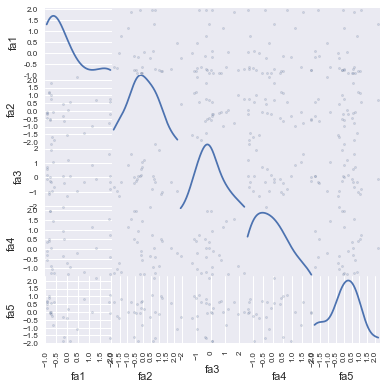

In [58]:
# show scatter plot matrix for the factor scores
# with kernel density estimate on the diagonal
scatter_matrix(fa_scores, alpha=0.2, figsize=(6, 6), diagonal='kde')


In [59]:
# the proportion of variance explained 
# may be computed directly from the loadings matrix
# sum the columns of the loadings matrix to obtain
fa_loadings_squared = np.square(fa_loadings)
fa_variance_explained = fa_loadings_squared.sum(axis=0)

[ 4.508  1.488  1.220  1.304  0.807]


In [60]:
# uniqueness represents the proportion of variable variance 
# that is unique to the variable, not shared with other variables
# communality represents the proportion of variable variance
# that is common to the factor analytic solution
# 1 - uniqueness 
fa_variable_communalities = fa_loadings_squared.sum(axis=1)
fa_variable_uniquenesses = 1 - fa_variable_communalities
print('Variable uniquenesses: ', fa_variable_uniquenesses)
print('Variable communalities: ', fa_variable_communalities)

('Variable uniquenesses: ', array([ 0.000,  0.058,  0.005,  0.100,  0.072,  0.372,  0.035,  0.000,
        0.031,  0.000]))
('Variable communalities: ', array([ 1.000,  0.942,  0.995,  0.900,  0.928,  0.628,  0.965,  1.000,
        0.969,  1.000]))


In [68]:
# use factor_rotation module to obtain varimax rotation
# where varimax_rotation is a matrix representing a linear transformation
varimax_loadings, varimax_rotation = fr.rotate_factors(fa_loadings,'varimax')

# show the loadings of the variables on the varimax-rotated factors
# for the unrotated maximum likelihood solution
# print loadings while rounding to three digits 
# and suppress printing of very small numbers
# but do not suppress printing of zeroes
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print('Varimax factor loadings: ',varimax_loadings)  

# demonstrate how the varimax-rotated loadings are obtained
# as the dot product of the original unrotated loadings matrix
# and the varimax transition matrix (rotation matrix)
print(fa_loadings.dot(varimax_rotation))

# the proportion of variance explained 
# may be computed directly from the loadings matrix
# sum the columns of the loadings matrix to obtain
varimax_loadings_squared = np.square(varimax_loadings)
varimax_variance_explained = varimax_loadings_squared.sum(axis=0)
print(varimax_variance_explained)

# uniqueness represents the proportion of variable variance 
# that is unique to the variable, not shared with other variables
# communality represents the proportion of variable variance
# that is common to the factor analytic solution
# 1 - uniqueness 
# rotation of the factor axes does not affect variable communalities
# or uniquenesses
varimax_variable_communalities = varimax_loadings_squared.sum(axis=1)
varimax_variable_uniquenesses = 1 - varimax_variable_communalities
print('Varimax variable uniquenesses: ', varimax_variable_uniquenesses)
print('Varimax variable communalities: ', varimax_variable_communalities)

# try interpreting the varimax-rotated solution...
# to what extent does it match up with the big five
# personality factors...
# if the factors do not match up with the big five,
# try naming the identified factors yourself

# naming of factors is as much art as science...
# refer to the matrix of factor loadings and
# note the variables that have the highest
# positive and negative loadings on each factor...
# then come up with a words that describe these variables

# note that scores on factors are not fully determined by 
# a factor analytic solution... factor scores are "indeterminate"  
# this means that there is an infinite number of ways of assigning 
# factor scores for any given set of factor loadings...
# this is yet another reason for statisticians to decry 
# factor analytic methods, choosing to stick with unrotated 
# principal components analysis.  

('Varimax factor loadings: ', array([[-0.917, -0.313, -0.191, -0.041,  0.150],
       [-0.818, -0.508, -0.084, -0.014,  0.089],
       [ 0.945,  0.209, -0.106, -0.215, -0.020],
       [ 0.932,  0.058, -0.070,  0.152,  0.005],
       [ 0.618, -0.189,  0.211,  0.172, -0.660],
       [ 0.055, -0.197,  0.028,  0.263, -0.718],
       [ 0.290,  0.776,  0.006,  0.325,  0.417],
       [ 0.261,  0.951,  0.153, -0.043,  0.043],
       [-0.025,  0.086, -0.048,  0.970, -0.138],
       [ 0.016,  0.124,  0.989, -0.044, -0.065]]))
[[-0.917 -0.313 -0.191 -0.041  0.150]
 [-0.818 -0.508 -0.084 -0.014  0.089]
 [ 0.945  0.209 -0.106 -0.215 -0.020]
 [ 0.932  0.058 -0.070  0.152  0.005]
 [ 0.618 -0.189  0.211  0.172 -0.660]
 [ 0.055 -0.197  0.028  0.263 -0.718]
 [ 0.290  0.776  0.006  0.325  0.417]
 [ 0.261  0.951  0.153 -0.043  0.043]
 [-0.025  0.086 -0.048  0.970 -0.138]
 [ 0.016  0.124  0.989 -0.044 -0.065]]
[ 3.811  2.007  1.109  1.220  1.181]
('Varimax variable uniquenesses: ', array([ 0.000,  0.058,  